In [49]:
%matplotlib inline

import pandas as pd
import numpy as np

In [16]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
tables = pd.read_html(url, decimal=',', thousands='')
birth_rate_table = tables[12]
birth_rate_table.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [4]:
birth_rate_table.shape

(28, 9)

In [17]:
birth_rate_table.replace('—', np.nan, inplace=True)
birth_rate_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [18]:
birth_rate_table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [19]:
columns_to_convert = ['2014', '2019']
birth_rate_table[columns_to_convert] = birth_rate_table[columns_to_convert].apply(pd.to_numeric, errors='coerce')
birth_rate_table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [20]:
missing_percentages = (birth_rate_table.isnull().sum() / len(birth_rate_table)) * 100
missing_percentages

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

In [21]:
birth_rate_table = birth_rate_table[:-1]
birth_rate_table.shape

(27, 9)

In [22]:
numeric_columns = birth_rate_table.select_dtypes(include=[np.number]).columns
mean_values = birth_rate_table[numeric_columns].mean()
change_to_mean = birth_rate_table.loc[:, numeric_columns].fillna(mean_values)
birth_rate_table.loc[:, numeric_columns] = change_to_mean.round(1)
birth_rate_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [23]:
average_birth_rate_ukraine = birth_rate_table['2019'].mean()
high_birth_rate_regions = birth_rate_table[birth_rate_table['2019'] > average_birth_rate_ukraine]
high_birth_rate_regions_list = high_birth_rate_regions['Регіон'].tolist()
high_birth_rate_regions_list

['Волинська',
 'Закарпатська',
 'Івано-Франківська',
 'Львівська',
 'Одеська',
 'Рівненська',
 'Херсонська',
 'Чернівецька',
 'Київ']

In [24]:
highest_birth_rate_region_2014 = birth_rate_table.loc[birth_rate_table['2014'].idxmax(), 'Регіон']
highest_birth_rate_region_2014

'Рівненська'

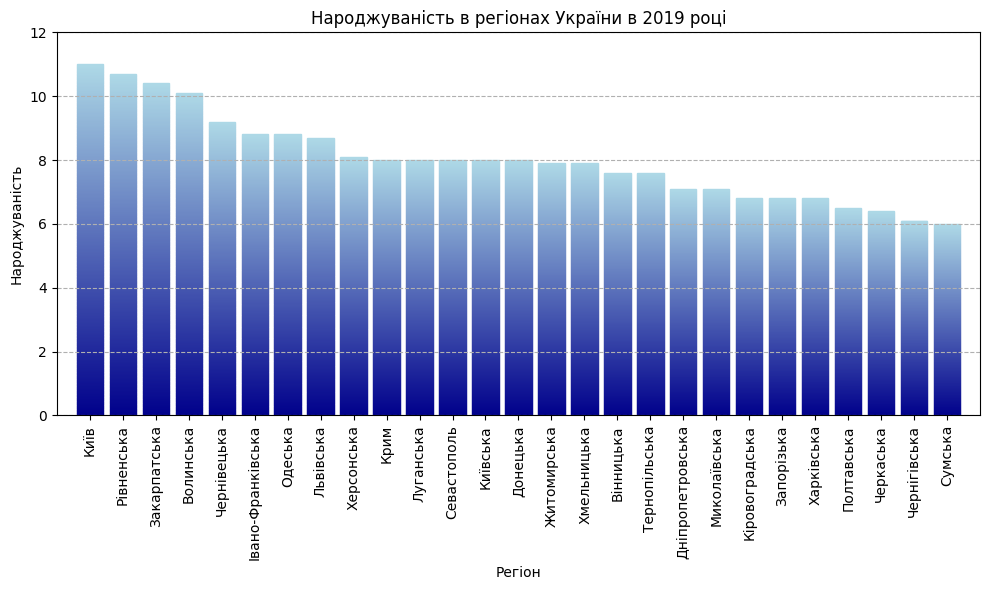

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.transforms as transforms

sorted_birth_rates = birth_rate_table.sort_values(by='2019', ascending=False)

def gradient_bar(ax, x, y, width=0.8, bottom=0, **kwargs):
    cmap = LinearSegmentedColormap.from_list('blue_gradient', ['#00008B', '#ADD8E6'])
    norm = plt.Normalize(0, y)
    colors = cmap(norm(np.linspace(0, y, 256)))
    
    for i, color in enumerate(colors):
        rect = Rectangle((x - width/2, bottom + i*y/256), width, y/256, color=color, **kwargs)
        ax.add_patch(rect)

fig, ax = plt.subplots(figsize=(10, 6))

for idx, (region, rate) in enumerate(zip(sorted_birth_rates['Регіон'], sorted_birth_rates['2019'])):
    gradient_bar(ax, idx, rate)

ax.set_xticks(range(len(sorted_birth_rates['Регіон'])))
ax.set_xticklabels(sorted_birth_rates['Регіон'], rotation=90)
ax.set_xlim(-1, len(sorted_birth_rates['Регіон']))
ax.set_ylim(0, sorted_birth_rates['2019'].max()+1)
ax.set_title('Народжуваність в регіонах України в 2019 році')
ax.set_xlabel('Регіон')
ax.set_ylabel('Народжуваність')
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()